<a href="https://colab.research.google.com/github/jinjuan-cmd/DeepLearning/blob/main/Intro_to_NN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction to Neural Network

## Building blocks -Neurons

**Neuron**: A neuron take input , do some math in it and produce output

The process that pass inputs to output is called **feedforward**.

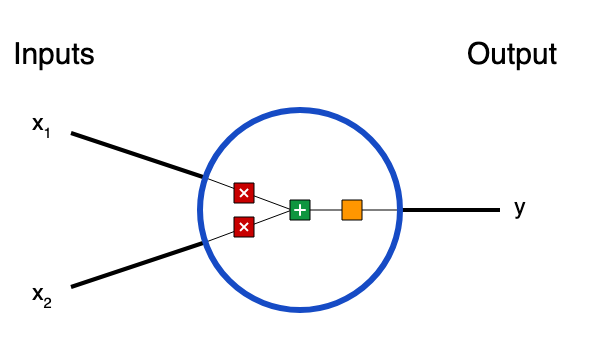


1.   inputs * weight
2.   sum the result from 1 and add bias
3.   the sum pass through activation function
The activation function is sigmod (−∞,+∞) to (0, 1)or relu (−∞,+∞) to (0,+∞) and the slope can change







In [ ]:
## code a Neuron
import numpy as np
def sigmoid(x):
  # activation function use sigmoid function f=1/(1+exp(-x))
  return 1/(1+np.exp(-x))

class Neuron:
  def __init__(self, weights, bias):
    self.weights=weights
    self.bias=bias

  def feedforward(self, inputs):
    ##multiply inputs, summation and add bias, pass trought activation function
    total=np.dot(inputs,self.weights)+self.bias
    return sigmoid(total)

weights = np.array([0, 1]) # w1 = 0, w2 = 1
bias = 4                   # b = 4
n = Neuron(weights, bias)

x = np.array([2, 3])       # x1 = 2, x2 = 3
print(n.feedforward(x))

0.9990889488055994


## Combine Neuros into Neural Network
Neural Network can have **any number of neuros** and **any number of layers**

Again, the basic idea is the Neural Network feed the inputs forward through neuros in the network to get outputs.

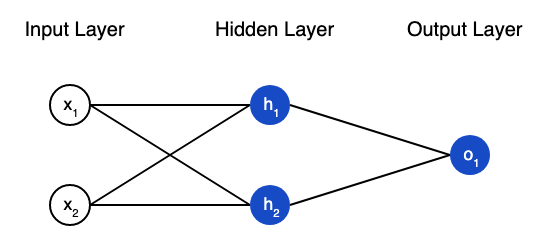

we can take this example to code

In [ ]:
import numpy as np
#...code from previous section
class OurNeuralNetwork:
  '''
  A neural network with:
    - 2 inputs
    - a hidden layer with 2 neurons (h1, h2)
    - an output layer with 1 neuron (o1)
  Each neuron has the same weights and bias:
    - w = [0, 1]
    - b = 0
  '''
  def __init__(self):
    weights=np.array([0,1])
    bias=0

    self.h1=Neuron(weights,bias)
    self.h2=Neuron(weights,bias)
    self.o1=Neuron(weights,bias)

  def feedforward(self,x):
    out_h1=self.h1.feedforward(x)
    out_h2=self.h2.feedforward(x)

    out_o1=self.o1.feedforward(np.array([out_h1,out_h2]))
    return out_o1

network=OurNeuralNetwork()
x = np.array([2, 3])
print(network.feedforward(x)) 



0.7216325609518421


## Train a neural network

### Loss

**mean squared loss** 

training is just trying to minimize loss

In [ ]:
## MSE Loss
import numpy as np
def mse_loss(y_true,y_pred):
  return np.mean((y_pred-y_true)**2)

y_true = np.array([1, 0, 0, 1])
y_pred = np.array([0, 0, 0, 0])

print(mse_loss(y_true, y_pred)) # 0.5

0.5


Our goal is to minimize loss, so can we use partial derivative. In our example,$y_pred=o1=f(w_5*h_1+w_6*h_2+b)$,$L(w_1,w_2,w_3,w_4,w_5,w_6,b_1,b_2,b_3)$.

The process of partial derivative by working backwrad is called **backprobagation**.

### Training: stochastic gradient descent
This is optimization algorithm that tell us how to change weights and bias to minimize loss. Basically, it follows the update equation:
$w_1←w_1−η ∂L/∂w_1$

**η** is constant and called learning rate, it controls how fast we train
​	

**The training process** like this:

1 choose **one** sample which is made on to stochastic gradient descent. Note, only operate one sample a time.

2 calculate partial derivative of loss function with respect to weights and bias

3 update the eaquation

4 go back to 1

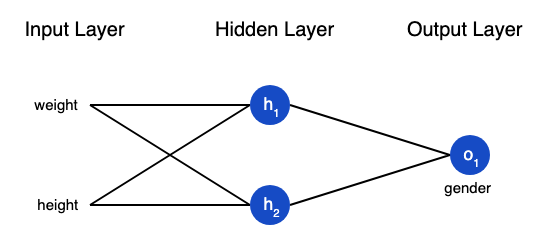

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: RuntimeWarning: overflow encountered in exp
  """


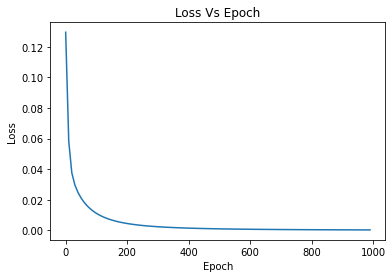

Emily: 0.988
Frank: 0.020


In [ ]:
# A complet Neural Network
import numpy as np

def sigmoid(x):
  return 1/(1+np.exp(-x))

def deriv_sigmoid(x):
  fx=sigmoid(x)
  return fx*(1-fx)

def mse_loss(y_true, y_pred):
  return ((y_pred-y_true)**2).mean()

class OurNeuralNetwork:
  '''
  A neural network with:
    - 2 inputs
    - a hidden layer with 2 neurons (h1, h2)
    - an output layer with 1 neuron (o1)

  *** DISCLAIMER ***:
  The code can be used to understand how this specific network works, but not optimal.
  '''

  def __init__(self):
    self.w1=np.random.normal()
    self.w2=np.random.normal()
    self.w3=np.random.normal()
    self.w4=np.random.normal()
    self.w5=np.random.normal()
    self.w6=np.random.normal()
    self.b1=np.random.normal()
    self.b2=np.random.normal()
    self.b3=np.random.normal()

  def feedforward(self,x):
    h1=sigmoid(np.dot(x,np.array([self.w1,self.w2]))+self.b1)
    h2=sigmoid(np.dot(x,np.array([self.w3,self.w4]))+self.b2)
    o1=sigmoid(np.dot(np.array([h1,h2]),np.array([self.w5,self.w6]))+self.b3)
    return o1

  def train(self, data, all_y_true):
    '''
    - data is a (n x 2) numpy array, n = # of samples in the dataset.
    - all_y_trues is a numpy array with n elements.
      Elements in all_y_trues correspond to those in data.
    '''
    learn_rate=0.1
    epochs=1000 # number of times to loop through the entire dataset
    all_loss=[]

    for epoch in range(epochs):
      for x, y_true in zip(data, all_y_true):
        h1=sigmoid(np.dot(x,np.array([self.w1,self.w2]))+self.b1)
        h2=sigmoid(np.dot(x,np.array([self.w3,self.w4]))+self.b2)
        o1=sigmoid(np.dot(np.array([h1,h2]),np.array([self.w5,self.w6]))+self.b3)
        y_pred=o1

        # --- Calculate partial derivatives.
        # --- Naming: d_L_d_w1 represents "partial L / partial w1"
        d_L_d_ypred=-2*(y_true-y_pred)
        # Neuron o1
        d_ypred_d_w5 = h1 * deriv_sigmoid(o1)
        d_ypred_d_w6 = h2 * deriv_sigmoid(o1)
        d_ypred_d_b3 = deriv_sigmoid(o1)

        d_ypred_d_h1 = self.w5 * deriv_sigmoid(o1)
        d_ypred_d_h2 = self.w6 * deriv_sigmoid(o1)

        # Neuron h1
        d_h1_d_w1 = x[0] * deriv_sigmoid(h1)
        d_h1_d_w2 = x[1] * deriv_sigmoid(h1)
        d_h1_d_b1 = deriv_sigmoid(h1)

        # Neuron h2
        d_h2_d_w3 = x[0] * deriv_sigmoid(h2)
        d_h2_d_w4 = x[1] * deriv_sigmoid(h2)
        d_h2_d_b2 = deriv_sigmoid(h2)

        # --- Update weights and biases
        # Neuron h1
        self.w1 -= learn_rate * d_L_d_ypred * d_ypred_d_h1 * d_h1_d_w1
        self.w2 -= learn_rate * d_L_d_ypred * d_ypred_d_h1 * d_h1_d_w2
        self.b1 -= learn_rate * d_L_d_ypred * d_ypred_d_h1 * d_h1_d_b1

        # Neuron h2
        self.w3 -= learn_rate * d_L_d_ypred * d_ypred_d_h2 * d_h2_d_w3
        self.w4 -= learn_rate * d_L_d_ypred * d_ypred_d_h2 * d_h2_d_w4
        self.b2 -= learn_rate * d_L_d_ypred * d_ypred_d_h2 * d_h2_d_b2

        # Neuron o1
        self.w5 -= learn_rate * d_L_d_ypred * d_ypred_d_w5
        self.w6 -= learn_rate * d_L_d_ypred * d_ypred_d_w6
        self.b3 -= learn_rate * d_L_d_ypred * d_ypred_d_b3

        # --- Calculate total loss at the end of each epoch
        
      if epoch % 10 == 0: 
        y_preds = np.apply_along_axis(self.feedforward, 1, data)
        loss = mse_loss(all_y_true, y_preds)
        all_loss.append(loss)
        #print("Epoch %d loss: %.3f" % (epoch, loss))
    
    import matplotlib.pyplot as plt
    
    fig, ax = plt.subplots()
    ax.plot(range(0,epochs,10), all_loss)
    ax.set(xlabel='Epoch', ylabel='Loss',
       title='Loss Vs Epoch')
    plt.show()

# Define dataset
data = np.array([
  [-2, -1],  # Alice
  [25, 6],   # Bob
  [17, 4],   # Charlie
  [-15, -6], # Diana
])
all_y_true = np.array([
  1, # Alice
  0, # Bob
  0, # Charlie
  1, # Diana
])

# Train our neural network!
network = OurNeuralNetwork()
network.train(data, all_y_true)

# Make some predictions
emily = np.array([-7, -3]) # 128 pounds, 63 inches
frank = np.array([20, 2])  # 155 pounds, 68 inches
print("Emily: %.3f" % network.feedforward(emily)) # 0.951 - F
print("Frank: %.3f" % network.feedforward(frank)) # 0.039 - M

